# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"
signnames_file = "./signnames.csv"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Create dictionary
id_name ={}
with open(signnames_file, mode='r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        id_name[row[0]] = row[1]

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validating examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

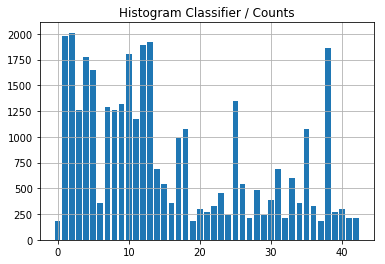

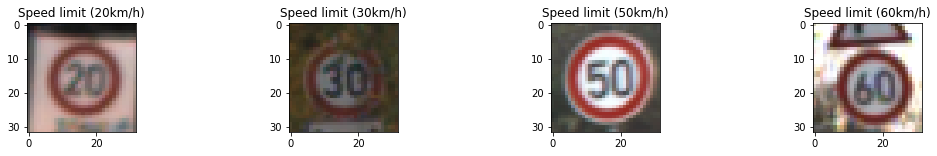

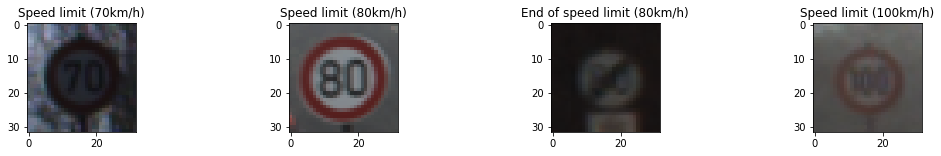

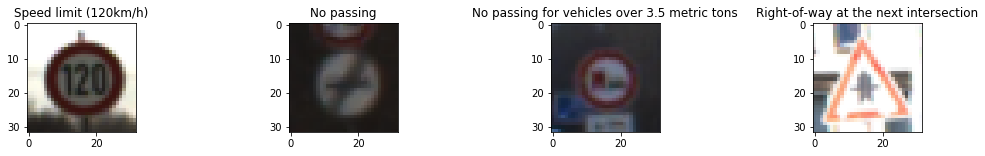

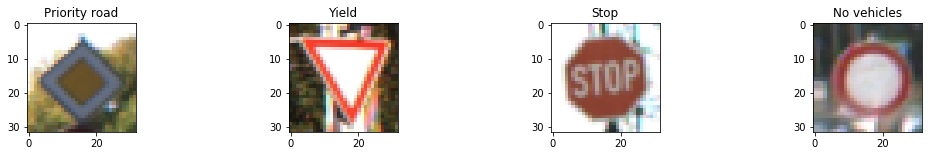

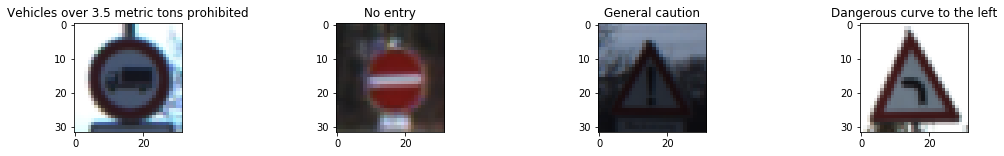

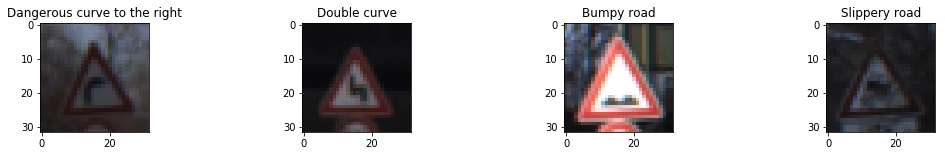

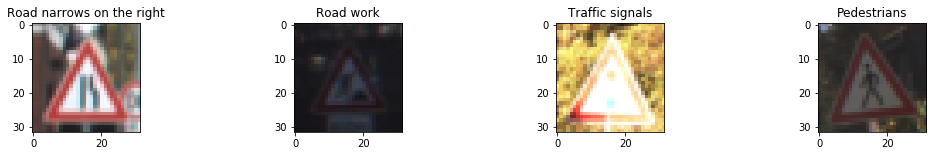

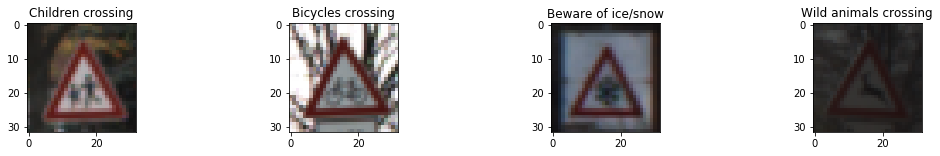

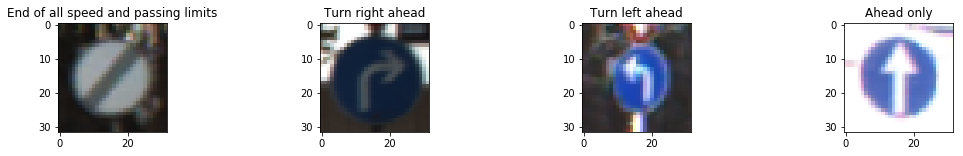

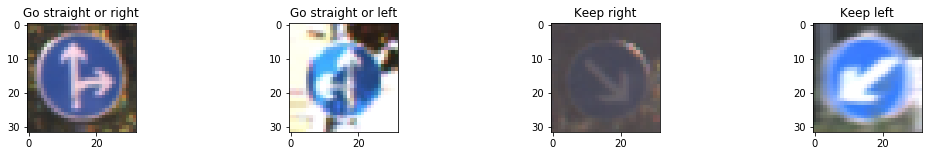

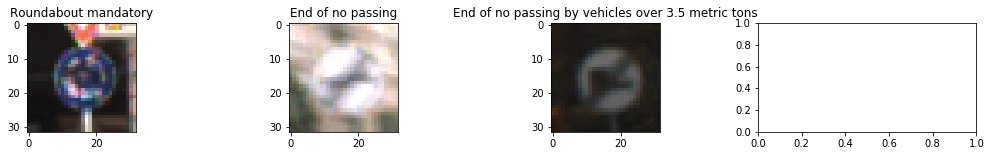

In [3]:
from itertools import compress, count, islice
from functools import partial
from operator import eq

import matplotlib.pyplot as plt
import random
import numpy as np

#Find the index of the n'th item in a list
def nth_item(n, item, iterable):
        indicies = compress(count(), list(map(partial(eq, item), iterable)))
        return next(islice(indicies, n, None), 0)

%matplotlib inline

#Get number of images per class
unique, counts = np.unique(y_train, return_counts=True)
#Plot number of images per class
plt.bar(unique, counts)
plt.grid()
plt.title("Histogram Classifier / Counts")
plt.show()

#Plot one random image per class
for idx in unique:
    title = id_name[str(unique[idx])]
    subset = (y_train == unique[idx])
    subindex = random.randint(0,counts[idx])
    image = X_train[nth_item(subindex,True,subset)].squeeze()
    if(idx%4 == 0):
        fig, axes = plt.subplots(1, 4, figsize=(18, 2))
    axes[idx%4].set_title(title)
    axes[idx%4].imshow(image)
    if(idx%4 == 3):
        plt.show()
    



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

**Normalization of the image data:**
- Norming the data by the streching the 'min'-'max' data range of each RGB image to the maximum range (0 to 255) (only if no histogram equilization was performed)
- Normalized the data to a new min-max range (e.g. -0.5 to 0.5) to produce a range on which our gradients don't go out of control.

**Equilize Histogram:**
I got better results when performing histogram equilization on each image instead of norming the RGB data to the maximum range (0 to 255). Therefore I convert the RGB image to YUV color space. Then I equalize the histogram of the Y channel (brightness range now is from 0 to 255). At the end I convert the YUV image back to RGB format.

**Grayscale:**
I tried out transforming the images to grayscale but I got the best results with histogram equilized RGB images. Probably the colors in the traffic signs can be used efficent in my CovNet.

**Tranforming:**
Transforming training images helps to make the NN more robust. Transforming could be: 
- Shifting the traffic sign image a few pixels in horizontal or vertical direction (-2 to 2 pixels)
- Rotating the image (-15 to 15 degrees)
- Scale the image (ratio of 0.9 to 1.1)

**Augmentation:**
Since the number of images per class varies a lot, I process augmentation for classes with less images. This will avoid overfitting the weights and biases for detecting classes with higher number of images.


In [4]:
import cv2
import scipy


from sklearn.utils import shuffle

def normalize(img):
    # Norm type:  Min/Max (center the rgb values of the image. 
    #             This has only effect if there was no equalization before)
    # Alpha/Beta: -0.5/0.5 (this will normalizes the values between -0.5 and 0.5)
    if((np.size(X_train,3)) == 1):
        return cv2.normalize(img, img, alpha=-0.5, beta=0.5, norm_type=cv2.NORM_MINMAX)
    else:
        return cv2.normalize(img, img, alpha=-0.5, beta=0.5, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

def equalizeHistogram(img):
    # convert to YUV color space
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # convert the YUV image back to RGB format
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def grayscale(img):
    # convert to YUV color space
    return np.sum(img/3, axis=2, keepdims=True)

def transform(img,horizontal, vertical, rotation, scale):
    # rotate image
    center = tuple(np.array(img.shape)[:2]/2) # 2d !
    rot_mat = cv2.getRotationMatrix2D(center,rotation,1.0)
    result = cv2.warpAffine(img, rot_mat, img.shape[:2],flags=cv2.INTER_LINEAR)
    
    moving_mat = np.float32([[1,0,horizontal],[0,1,vertical]])
    result = cv2.warpAffine(result,moving_mat,img.shape[:2])

    #height, width = result.shape[:2]
    #result = cv2.resize(result,(scale*width, scale*height), interpolation = cv2.INTER_CUBIC)
    #resize = scipy.misc.imresize(image, scale)
    #cropped = resize[0:31, 0:31]
    
    return result

def augmentation(X, y):
    X_toAppendTemp = []
    y_toAppendTemp = []
    classIds, numberOfImagesInClass = np.unique(y, return_counts=True)
    desiredNumOfImagesPerClass = np.max(numberOfImagesInClass)
    print("Max number of images:", desiredNumOfImagesPerClass)
    for idx in classIds:
        numToCreate = desiredNumOfImagesPerClass - numberOfImagesInClass[idx]
        subset = (y == unique[idx])
        numToCreate = int(numToCreate/4)
        print("Class", idx, "Number to create", numToCreate)
        while(numToCreate > 0):
            #generate random values
            subindex = random.randint(0,counts[idx])
            move_vertical = random.randint(-2, 3)
            move_horizontal = random.randint(-2,3)
            rotate_angle = random.randint(-15,16)
            scale_factor = random.uniform(0.9,1.1)
            #make a copy of a image and transform it
            image = X[nth_item(subindex,True,subset)]
            X_toAppendTemp.append(transform(image,move_vertical, move_horizontal, rotate_angle, scale_factor))
            y_toAppendTemp.append(idx)
            numToCreate -= 1
    return X_toAppendTemp, y_toAppendTemp



Double check the pre-process functions on an image

RGB shape: (32, 32, 3)
Grayscale shape: (32, 32, 1)
0.00859401
-0.5
0.5


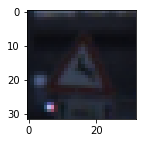

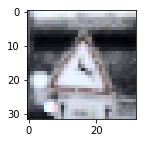

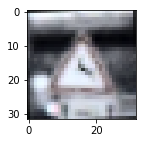

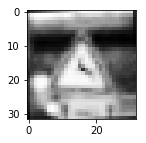

In [5]:

# process test image 
image_print = X_train[random.randint(0, len(X_train))].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(image_print)

#1. Histogram
image_print2 = equalizeHistogram(image_print)
plt.figure(figsize=(2,2))
plt.imshow(image_print2)

#2. Transform
image_print3 = transform(image_print2,random.randint(-2, 3), random.randint(-2, 3), random.randint(-15,16), random.uniform(0.9,1.1))
plt.figure(figsize=(2,2))
plt.imshow(image_print3)

# Grayscale
image_print4 = np.array(grayscale(image_print3))
print('RGB shape:', image_print3.shape)
print('Grayscale shape:', image_print4.shape)
plt.figure(figsize=(2,2))
plt.imshow(image_print4.squeeze(), cmap='gray')

image_print4 = np.array(normalize(image_print4))
print(np.mean(image_print4))
print(np.min(image_print4))
print(np.max(image_print4))

Pre-process data

Max number of images: 2010
Class 0 Number to create 457
Class 1 Number to create 7
Class 2 Number to create 0
Class 3 Number to create 187
Class 4 Number to create 60
Class 5 Number to create 90
Class 6 Number to create 412
Class 7 Number to create 180
Class 8 Number to create 187
Class 9 Number to create 172
Class 10 Number to create 52
Class 11 Number to create 210
Class 12 Number to create 30
Class 13 Number to create 22
Class 14 Number to create 330
Class 15 Number to create 367
Class 16 Number to create 412
Class 17 Number to create 255
Class 18 Number to create 232
Class 19 Number to create 457
Class 20 Number to create 427
Class 21 Number to create 435
Class 22 Number to create 420
Class 23 Number to create 390
Class 24 Number to create 442
Class 25 Number to create 165
Class 26 Number to create 367
Class 27 Number to create 450
Class 28 Number to create 382
Class 29 Number to create 442
Class 30 Number to create 405
Class 31 Number to create 330
Class 32 Number to create 450
Cl

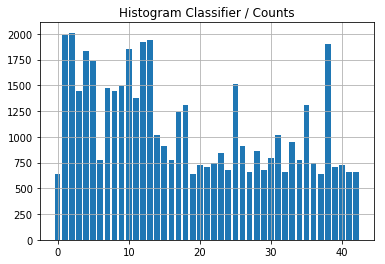

(4410, 32, 32, 1)
(4410, 32, 32, 1)
(4410, 32, 32, 1)


In [6]:
# Histogram equalization of Y-dimension (U-V- unchanged) for train, validation and test dataset
for index,image in enumerate(X_train):
    X_train[index] = equalizeHistogram(image)

for index,image in enumerate(X_valid):
    X_valid[index] = equalizeHistogram(image)

for index,image in enumerate(X_test):
    X_test[index] = equalizeHistogram(image)

# Process augmentation (for train and validation data set)
X_toAppend, y_toAppend = augmentation(X_train,y_train)
X_train = np.concatenate((X_train, X_toAppend), axis=0)
y_train = np.concatenate((y_train, y_toAppend), axis=0)

#X_toAppend, y_toAppend = augmentation(X_valid,y_valid)
#X_valid = np.concatenate((X_valid, X_toAppend), axis=0)
#y_valid = np.concatenate((y_valid, y_toAppend), axis=0)
print(X_valid.shape)

#Number of new training data set
n_train = len(X_train)
print("Length X_train:", n_train)
#Plot number of images per class
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.grid()
plt.title("Histogram Classifier / Counts")
plt.show()

# Convert to grayscale
X_train_gray = []
X_valid_gray = []
X_test_gray = []
for index,image in enumerate(X_train):
    X_train_gray.append(grayscale(image))
for index,image in enumerate(X_valid):
    X_valid_gray.append(grayscale(image))
for index,image in enumerate(X_test):
    X_test_gray.append(grayscale(image))
X_train = np.asarray(X_train_gray)
X_valid = np.asarray(X_valid_gray)
X_test = np.asarray(X_test_gray)
print(X_valid.shape)

# in case grayscale is not used
if((np.size(X_train,3)) == 1):
    dimensionData = 1
else:
    dimensionData = 3
    X_train = 1. * X_train
    X_valid = 1. * X_valid
    X_test = 1. * X_test

for index,image in enumerate(X_train):
    X_train[index] = normalize(image)

for index,image in enumerate(X_valid):
    X_valid[index] = normalize(image)
print(X_valid.shape)
for index,image in enumerate(X_test):
    X_test[index] = normalize(image)

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
print(X_valid.shape)

Caution! Only store the new data if you want to! This overwrites the old data

In [7]:
# store pre-processed data files

with open('X_train.p', 'wb') as f:
    pickle.dump(X_train, f)
with open('y_train.p', 'wb') as f:
    pickle.dump(y_train, f)

print("New pickle files X_train.p and y_train.p are stored!")

with open('X_valid.p', 'wb') as f:
    pickle.dump(X_valid, f)
with open('y_valid.p', 'wb') as f:
    pickle.dump(y_valid, f)

print("New pickle files X_valid.p and y_valid.p are stored!")

with open('X_test.p', 'wb') as f:
    pickle.dump(X_test, f)
with open('y_test.p', 'wb') as f:
    pickle.dump(y_test, f)

print("New pickle files X_test.p and y_test.p are stored!")


New pickle files X_train.p and y_train.p are stored!
New pickle files X_valid.p and y_valid.p are stored!
New pickle files X_test.p and y_test.p are stored!


In [66]:
with open('X_train.p', 'rb') as f:
    X_train = pickle.load(f)
with open('y_train.p', 'rb') as f:
    y_train = pickle.load(f)

print("Number of training images:", len(X_train))

with open('X_valid.p', 'rb') as f:
    X_valid = pickle.load(f)
with open('y_valid.p', 'rb') as f:
    y_valid = pickle.load(f)

with open('X_test.p', 'rb') as f:
    X_test = pickle.load(f)
with open('y_test.p', 'rb') as f:
    y_test = pickle.load(f)

Number of training images: 47695


(32, 32, 1)


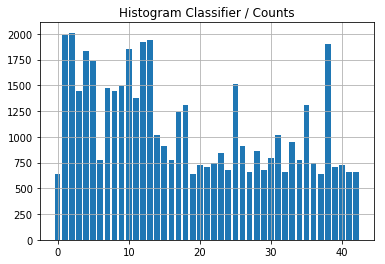

In [67]:
print(X_train[0].shape)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.grid()
plt.title("Histogram Classifier / Counts")
plt.show()

if((np.size(X_train,3)) == 1):
    dimensionData = 1
else:
    dimensionData = 3

### Model Architecture

In [68]:
import tensorflow as tf

#Check if GPU support is available. #pip uninstall tensorflow / pip install tensorflow-gpu
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

EPOCHS = 30
BATCH_SIZE = 128

In [69]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x,dim):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x'dim'. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, dim, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)
    #dropout here

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)
    #dropout here

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 (n_classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [70]:
x = tf.placeholder(tf.float32, (None, 32, 32, dimensionData))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

### Training Pipeline
Create a training pipeline that uses the model to classify GTSRB data.


In [71]:
rate = 0.001

logits = LeNet(x,dimensionData)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.


In [72]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [73]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.707

EPOCH 2 ...
Validation Accuracy = 0.799

EPOCH 3 ...
Validation Accuracy = 0.875

EPOCH 4 ...
Validation Accuracy = 0.882

EPOCH 5 ...
Validation Accuracy = 0.914

EPOCH 6 ...
Validation Accuracy = 0.937

EPOCH 7 ...
Validation Accuracy = 0.941

EPOCH 8 ...
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.964

EPOCH 10 ...
Validation Accuracy = 0.961

EPOCH 11 ...
Validation Accuracy = 0.965

EPOCH 12 ...
Validation Accuracy = 0.968

EPOCH 13 ...
Validation Accuracy = 0.965

EPOCH 14 ...
Validation Accuracy = 0.968

EPOCH 15 ...
Validation Accuracy = 0.968

EPOCH 16 ...
Validation Accuracy = 0.975

EPOCH 17 ...
Validation Accuracy = 0.975

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.973

EPOCH 20 ...
Validation Accuracy = 0.976

EPOCH 21 ...
Validation Accuracy = 0.974

EPOCH 22 ...
Validation Accuracy = 0.972

EPOCH 23 ...
Validation Accuracy = 0.977

EPOCH 24 ...
Validation Accura

### Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [74]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

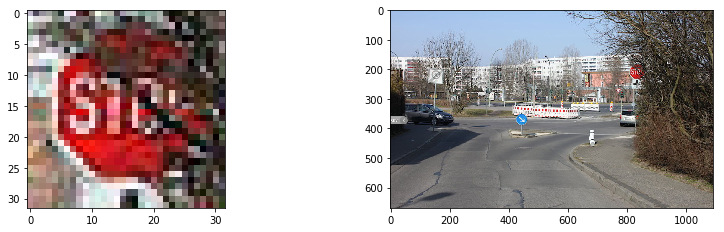

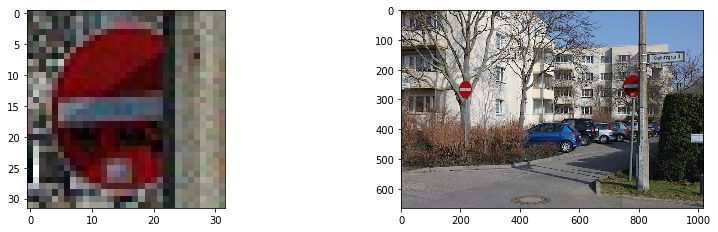

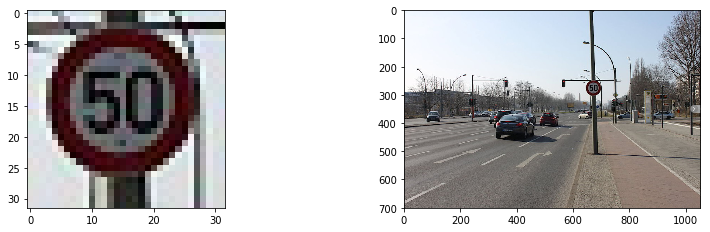

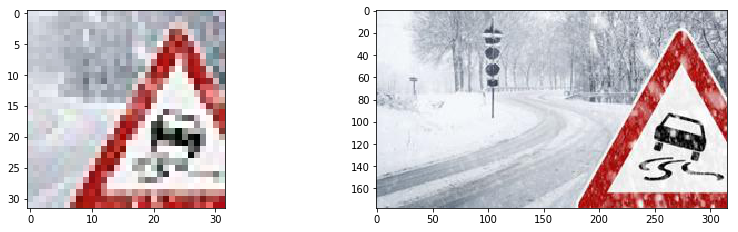

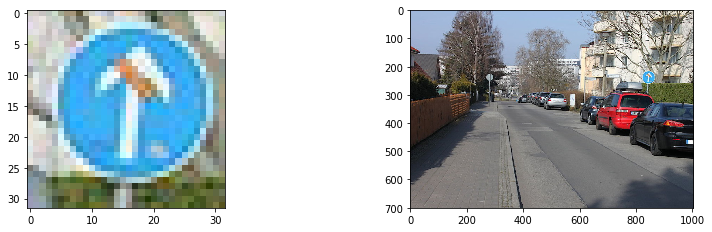

[14, 17, 2, 23, 35]
(5, 32, 32, 3)


In [75]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

additionalSignsPath = "additionalSigns/"
additionalSignsPathWholePic = "additionalSignsWhole/"
load_images = os.listdir(additionalSignsPath)

X_newTestImg=[]
y_newTestImg=[]
for file in load_images:
    y_newTestImg.append(int(file.rsplit('.', 1)[0]))
    picture = mpimg.imread(additionalSignsPath+file)
    pictureWhole = mpimg.imread(additionalSignsPathWholePic+file)
    X_newTestImg.append(picture)
    plt.figure(figsize = (14,8))
    plt.subplot(221)
    plt.imshow(picture)
    plt.subplot(222)
    plt.imshow(pictureWhole)
    plt.show()

X_newTestImg = np.array(X_newTestImg)
print (y_newTestImg)
print(X_newTestImg.shape)


### Predict the Sign Type for Each Image

In [76]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_newTestImg_preprocessed = X_newTestImg

for index,image in enumerate(X_newTestImg_preprocessed):
    X_newTestImg_preprocessed[index] = equalizeHistogram(image)

X_newTest_gray = []
for index,image in enumerate(X_newTestImg_preprocessed):
    X_newTest_gray.append(grayscale(image))
X_newTestImg_preprocessed = np.asarray(X_newTest_gray)

if((np.size(X_newTestImg_preprocessed,3)) == 1):
    dimensionData = 1
else:
    dimensionData = 3
    X_newTestImg_preprocessed = 1. * X_newTestImg_preprocessed

for index,image in enumerate(X_newTestImg_preprocessed):
    X_newTestImg_preprocessed[index] = normalize(image)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_newTestImg_preprocessed, y_newTestImg)


INFO:tensorflow:Restoring parameters from .\lenet


### Analyze Performance

In [77]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Test Accuracy = {:.1f}".format((100*test_accuracy)), "%")

Test Accuracy = 60.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image).

INFO:tensorflow:Restoring parameters from .\lenet


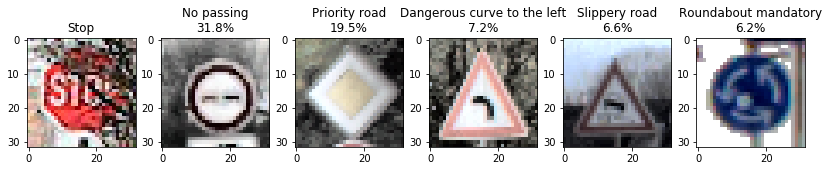

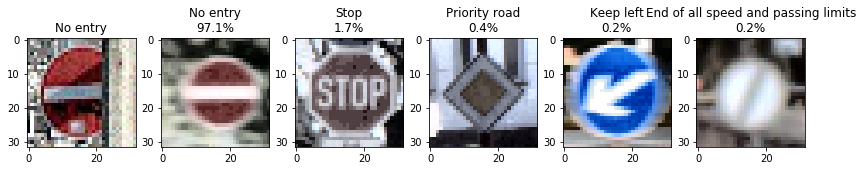

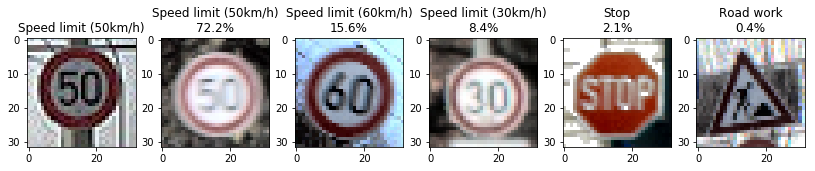

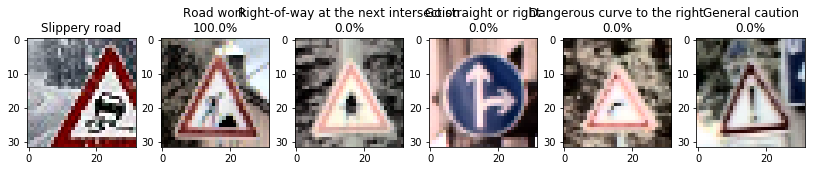

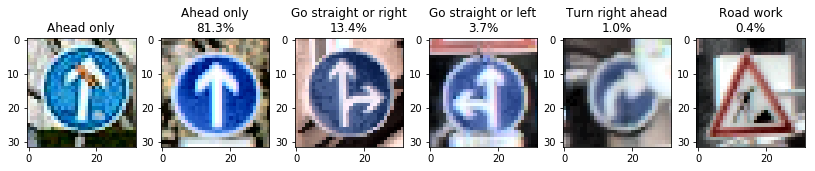

In [78]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

#logits = LeNet(x,dimensionData)
softmax_new = tf.nn.softmax(logits)
top_k_new = tf.nn.top_k(softmax_new, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    res_top_k_new = sess.run(top_k_new, feed_dict={x: X_newTestImg_preprocessed, y: y_newTestImg, keep_prob: 1.0})

X_testRaw, y_testRaw = test['features'], test['labels']
unique, counts = np.unique(y_testRaw, return_counts=True)

for i, image in enumerate(X_newTestImg):
    fig, axes = plt.subplots(1, 6, figsize=(14, 2))
    title = id_name[str(y_newTestImg[i])]
    axes[0].set_title(title)
    axes[0].imshow(image)
    for kIdx in range(0, 5):
        title = (id_name[str(res_top_k_new[1][i][kIdx])] + "\n{:.1f}".format(100*(res_top_k_new[0][i][kIdx])) + "%")
        axes[kIdx+1].set_title(title)
        subset = (y_testRaw == unique[res_top_k_new[1][i][kIdx]])
        subindex = random.randint(0,counts[res_top_k_new[1][i][kIdx]])
        subImage = X_testRaw[nth_item(subindex,True,subset)].squeeze()
        axes[kIdx+1].imshow(subImage)
    plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")